In [1]:
from datasets import load_dataset
from transformers import AutoTokenizer

import matplotlib.pyplot as plt

/Users/id4thomas/miniforge3/envs/torch2/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
# Put your huggingface api key here
AUTH_TOKEN = ""

In [3]:
tokenizer = AutoTokenizer.from_pretrained(
	"meta-llama/Llama-2-7b-chat-hf",
	use_auth_token = AUTH_TOKEN
)

/Users/id4thomas/miniforge3/envs/torch2/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1714: FutureWarning: The `use_auth_token` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [4]:
data = load_dataset("beomi/KoAlpaca-v1.1a")

Found cached dataset parquet (/Users/id4thomas/.cache/huggingface/datasets/beomi___parquet/beomi--KoAlpaca-v1.1a-1465f66eb846fd61/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)
100%|██████████| 1/1 [00:00<00:00, 290.71it/s]


In [5]:
print(data)

DatasetDict({
    train: Dataset({
        features: ['instruction', 'output', 'url'],
        num_rows: 21155
    })
})


In [7]:
inst_text_lens = [len(inst) for inst in data["train"]["instruction"]]
inst_token_lens = [tokenizer(inst, return_tensors="pt")["input_ids"].shape[-1] for inst in data["train"]["instruction"]]

In [9]:
print("Instruction text lens")
print("Min: {}, Max: {}, Avg: {}".format(min(inst_text_lens), max(inst_text_lens), sum(inst_text_lens)/len(inst_text_lens)))

print("Instruction token lens")
print("Min: {}, Max: {}, Avg: {}".format(min(inst_token_lens), max(inst_token_lens), sum(inst_token_lens)/len(inst_token_lens)))

Instruction text lens
Min: 9, Max: 711, Avg: 69.94937367052707
Instruction token lens
Min: 11, Max: 953, Avg: 107.45218624438667


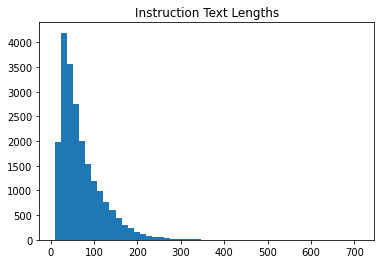

In [11]:
plt.hist(inst_text_lens, bins = 50)
plt.title("Instruction Text Lengths")
plt.show()

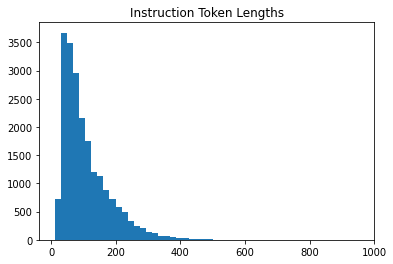

In [12]:
plt.hist(inst_token_lens, bins = 50)
plt.title("Instruction Token Lengths")
plt.show()

In [13]:
out_text_lens = [len(output) for output in data["train"]["output"]]
out_token_lens = [tokenizer(output, return_tensors="pt")["input_ids"].shape[-1] for output in data["train"]["output"]]

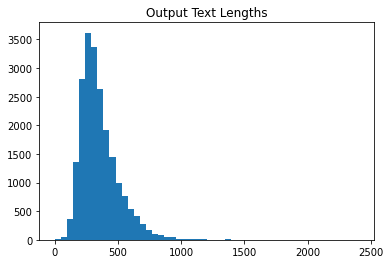

In [15]:
plt.hist(out_text_lens, bins = 50)
plt.title("Output Text Lengths")
plt.show()

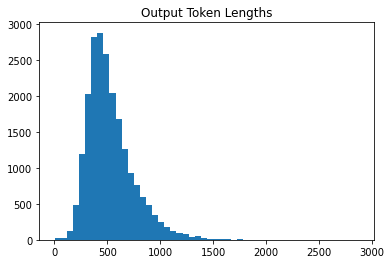

In [16]:
plt.hist(out_token_lens, bins = 50)
plt.title("Output Token Lengths")
plt.show()